In [18]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [19]:
#initial conditions for Euler's method
#global constants

z0 = 100.0 #altitude
b0 = 10.0 #upward velocity resulting from gust
zt = 100.0
g = 9.81

#all numbers are floats

In [20]:
#Function for Numerical Solution of Euler Method
def euler_function(T, dt):
   
    N = int(T/dt) + 1
    t = numpy.linspace(0.0, T, N)
    
    global z0, b0, zt, g
    
    u = numpy.array([z0, b0])
    z = numpy.zeros(N)
    z[0] = z0
    
    #time-loop for Euler method
    for n in range(1,N):
        u = u + dt*numpy.array([u[1], g*(1-u[0]/zt)])
        z[n] = u[0]
        
    return z, t

In [21]:
#Function for the Exact Solution of Euler Method
def exact_sol(T, dt):
    
    N = int(T/dt) + 1
    t = numpy.linspace(0.0, T, N)
    
    global z0, b0, zt, g
    
    z_exact = b0 * (zt/g)**.5 * numpy.sin((g/zt)**.5 * t) + (z0-zt) * numpy.cos((g/zt)**.5 * t) + zt
    
    return z_exact, t

In [22]:
#time-increment array
dt_values = numpy.array([0.1, 0.05, 0.01, 0.005, 0.001, 0.0001])
error_values = numpy.empty_like(dt_values)    

N = len(dt_values)
       
for i in range(N):
    [z,t] = euler_function(100.0, dt_values[i])
    [z_exact,t] = exact_sol(100.0,dt_values[i])
    error_values[i] = dt_values[i] * numpy.sum(numpy.abs(z-z_exact))


(0.0001, 0.10000000000000001, 1.0, 10000.0)

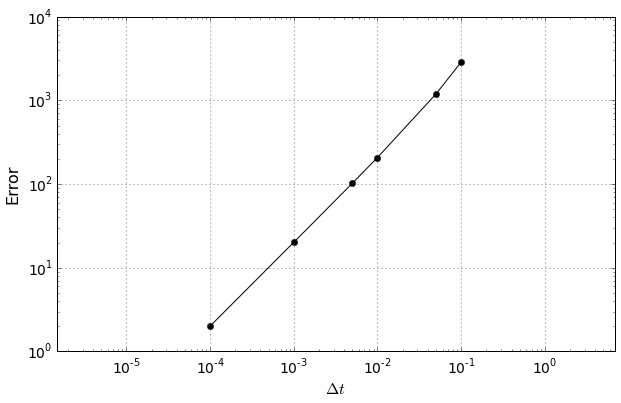

In [23]:
#use loglog plot for plot delta t vs the error.  
#Loglog plots are almost always used to asses the errors of a numerical scheme graphically

pyplot.figure(figsize=(10,6))
pyplot.tick_params(axis='both', labelsize=14) #increase tick font size
pyplot.grid(True)                             #turn on grid lines
pyplot.xlabel('$\Delta t$', fontsize=16)      #xlabel with delta t symbol
pyplot.ylabel('Error', fontsize=16)           #ylabel
pyplot.loglog(dt_values, error_values, 'ko-') #log-log plot
pyplot.axis('equal')                          #make axes scale equally